In [2]:
import pandas as pd
import datetime
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from pylab import rcParams
rcParams['figure.figsize'] = 10, 10
rcParams['font.size']=22

In [7]:
def convert_str_to_datetime(date_str):
    # convert from m/d/YY to datetime object
#     print(date_str)
    date_str='{}/{}/20{}'.format(date_str.split('/')[0],date_str.split('/')[1],date_str.split('/')[2])
#     print(date_str)
    date_time_obj = datetime.datetime.strptime(date_str, '%m/%d/%Y')
    return date_time_obj.date()



# NORDIC:BALTIC


In [167]:
df_emission_data=pd.read_excel('raw data/NORDIC:BALTIC/EU_allowance_price.xlsx')
# print(df_emission_data.head())

In [168]:
df_emission_data['New date']=[x.date() for x in df_emission_data['DATE']]

# print(list(set(df_emission_data['New date'])))

In [169]:
# df_emission_data.head()

In [170]:
df_EU=pd.DataFrame()
df_EU['Date carbon auction']=df_emission_data['New date']
df_EU['carbon price']=df_emission_data['CLOSING PRICE']
df_EU['Electricity delivery date']=[x+datetime.timedelta(1) for x in df_EU['Date carbon auction']]

In [171]:
df_electricity_price=pd.read_excel('raw data/NORDIC:BALTIC/elspot_price_2018_hourly.xlsx')

In [172]:
df_electricity_price['Date']=[str("{:%d-%m-%Y}".format(x))  if type(x) is datetime.datetime else x for x in df_electricity_price['Date'] ]

In [173]:
temp_dict={}
for date in list(set(df_electricity_price['Date'])):
    temp_dict.update({date:{}})
    temp_df = df_electricity_price.drop(list(np.where(df_electricity_price['Date']!=date)[0])).copy()
    temp_df.reset_index(inplace=True)
    temp_df=temp_df.dropna()
    temp_df.reset_index(inplace=True)
    for area_name in ['SYS','SE1','SE2','SE3','SE4','FI','DK1','DK2','Oslo','Kr.sand','Bergen','Molde','Tr.heim','TromsÃ¸','EE','LV','LT']:
        temp_dict[date].update({area_name : np.array([float(x.replace(',','.')) for x in temp_df[area_name]])})


In [174]:
for area_name in ['SYS','SE1','SE2','SE3','SE4','FI','DK1','DK2','Oslo','Kr.sand','Bergen','Molde','Tr.heim','TromsÃ¸','EE','LV','LT']:
#     for date in [str("{:%d-%m-%Y}".format(x)) for x in list(df_EU['Electricity delivery date'])]:
#         if date in set(temp_dict.keys()):
#             print(date)
#             print(temp_dict[date][area_name].mean())
    df_EU['{}_mean'.format(area_name)]=[temp_dict[date][area_name].mean() if date in temp_dict.keys() else np.nan for date in [str("{:%d-%m-%Y}".format(x)) for x in list(df_EU['Electricity delivery date'])]]
    df_EU['{}_std'.format(area_name)]=[temp_dict[date][area_name].std() if date in temp_dict.keys() else np.nan for date in [str("{:%d-%m-%Y}".format(x)) for x in list(df_EU['Electricity delivery date'])]]



In [175]:
df_EU=df_EU.dropna()
df_EU.reset_index(inplace=True)
print(df_EU.head())


   index Date carbon auction  carbon price Electricity delivery date  \
0     70          2018-12-17         23.40                2018-12-18   
1     71          2018-12-13         21.88                2018-12-14   
2     72          2018-12-11         20.77                2018-12-12   
3     73          2018-12-10         19.77                2018-12-11   
4     74          2018-12-06         18.55                2018-12-07   

    SYS_mean    SYS_std   SE1_mean    SE1_std   SE2_mean    SE2_std  ...  \
0  59.997917   8.701994  59.480000   8.389881  59.480000   8.389881  ...   
1  59.292500   8.350277  59.468333   8.452907  59.468333   8.452907  ...   
2  61.586667  11.001824  60.737500  10.546615  60.737500  10.546615  ...   
3  45.383750   4.202895  45.020417   3.966350  45.020417   3.966350  ...   
4  52.491250   2.085019  53.764583   3.075830  53.764583   3.075830  ...   

   Tr.heim_mean  Tr.heim_std  TromsÃ¸_mean  TromsÃ¸_std    EE_mean     EE_std  \
0     59.480000     8.389881 

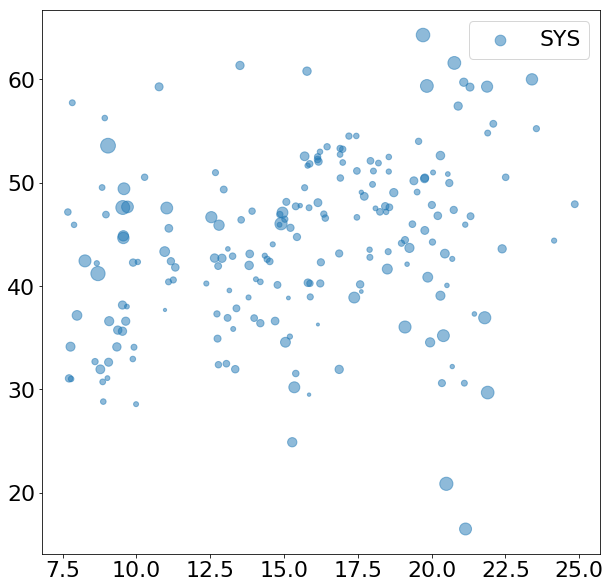

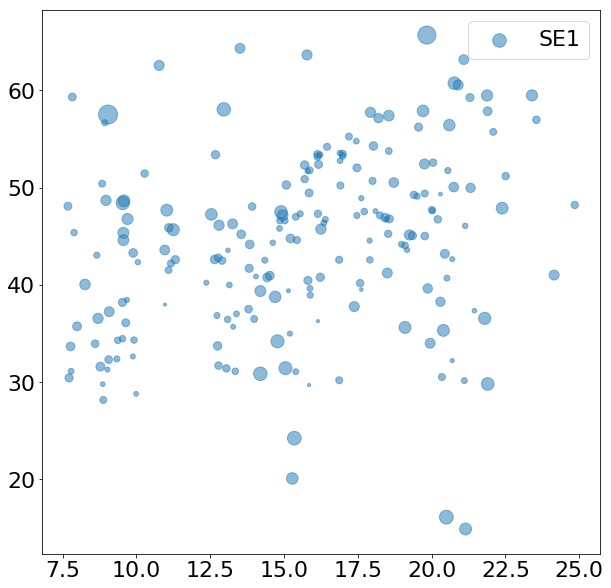

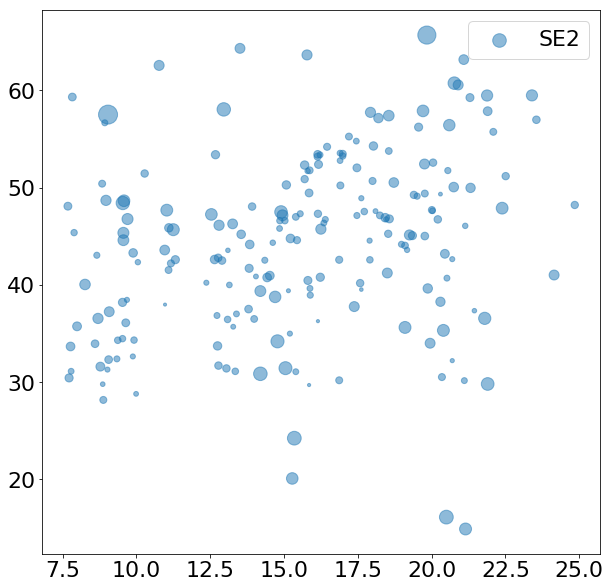

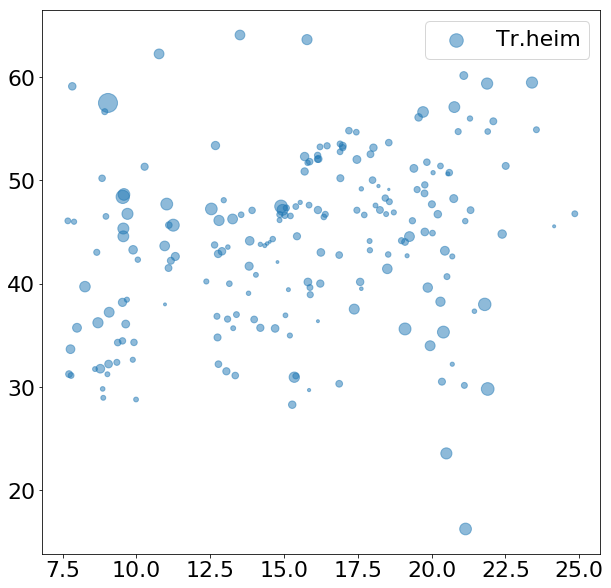

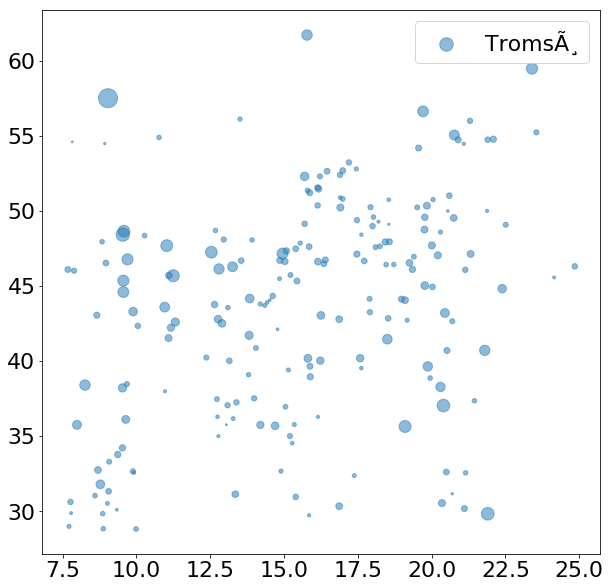

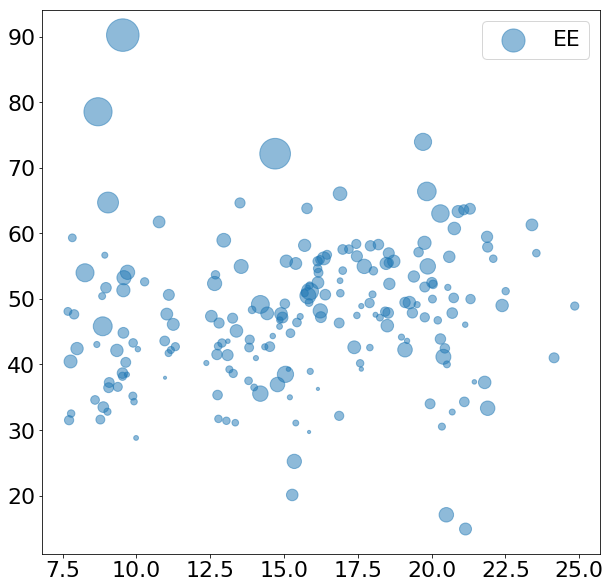

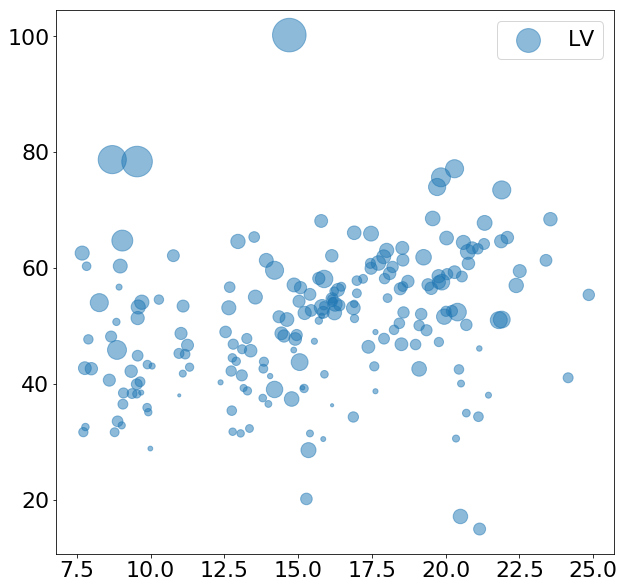

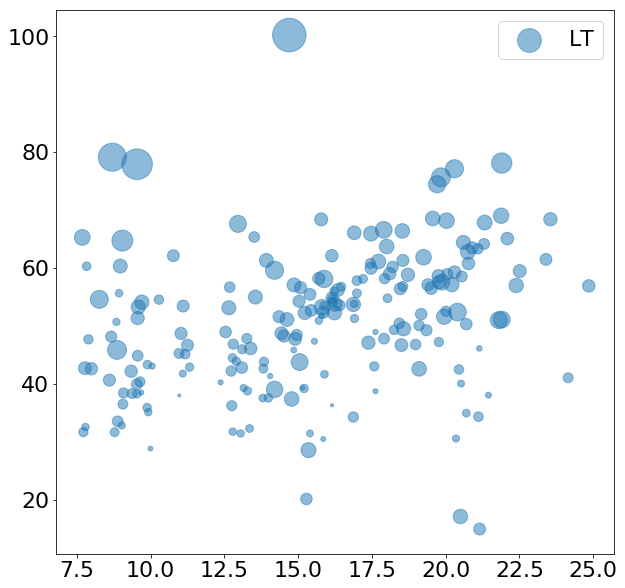

In [193]:
x=df_EU['carbon price']
for market in ['SYS', 'SE1', 'SE2', 'Tr.heim', 'TromsÃ¸', 'EE', 'LV', 'LT']:
    fig1, ax1 = plt.subplots()
    y=df_EU['{}_mean'.format(market)]
    area=df_EU['{}_std'.format(market)]
    ax1.scatter(x,y, s=area*15, alpha=0.5, label='{}'.format(market))
    ax1.legend()
    plt.show()

# CAISO

In [8]:
df_emission_data=pd.read_csv('raw data/CAISO/Cali_carbon_dash.csv')
df_emission_data.dropna(axis=0, inplace=True)
df_emission_data.reset_index(inplace=True, drop=False)
del df_emission_data['index']

In [9]:
df_emission_data.head()

,date,Price
0,9/2/11,21.30
1,9/5/11,22.10
2,9/6/11,22.40
3,9/7/11,22.85
4,9/8/11,22.65


In [10]:
df_emission_data['New date']=[convert_str_to_datetime(x) for x in df_emission_data['date']]

In [176]:
# df_emission_data.tail(100)

In [43]:
print(type(df_emission_data['New date'][0]))

<class 'datetime.date'>


# RGGI and ISO-new england

In [47]:
df_emission_data=pd.read_excel('raw data/ISO new england/RGGI_CO2_allowance_clearing_price.xlsx')

df_emission_data['New_date']=["{:%d-%m-%Y}".format(x) for x in  df_emission_data['Date']]

print(df_emission_data.head())

      Auction       Date Quantity Offered CCR Sold Quantity Sold  \
0  Auction 43 2019-03-13      12,883,436        0    12,883,436    
1  Auction 42 2018-12-05      13,360,649        0    13,360,649    
2  Auction 41 2018-09-05      13,590,107        0    13,590,107    
3  Auction 40 2018-06-13      13,771,025        0    13,771,025    
4  Auction 39 2018-03-14      13,553,767        0    13,553,767    

  Clearing Price   Total Proceeds    New_date  
0         $5.27   $67,895,707.72   13-03-2019  
1         $5.35   $71,479,472.15   05-12-2018  
2         $4.50   $61,155,481.50   05-09-2018  
3         $4.02   $55,359,520.50   13-06-2018  
4         $3.79   $51,368,776.93   14-03-2018  


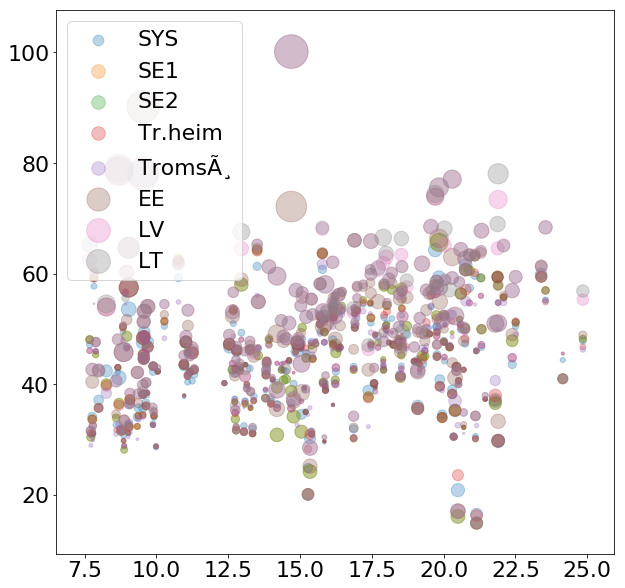

In [196]:
fig1, ax1 = plt.subplots()
x=df_EU['carbon price']
for market in ['SYS', 'SE1', 'SE2', 'Tr.heim', 'TromsÃ¸', 'EE', 'LV', 'LT']:
    y=df_EU['{}_mean'.format(market)]
    area=df_EU['{}_std'.format(market)]
    ax1.scatter(x,y, s=area*15, alpha=0.3, label='{}'.format(market))
ax1.legend()
plt.show()





In [53]:
df_electricity_price_data=pd.read_excel('raw data/ISO new england/2019_smd_hourly.xlsx', sheet_name='ME')

df_electricity_price_data['New Date']=["{:%d-%m-%Y}".format(x) for x in  df_electricity_price_data['Date']]

In [54]:
df_electricity_price_data

,Date,Hr_End,DA_Demand,RT_Demand,DA_LMP,DA_EC,DA_CC,DA_MLC,RT_LMP,RT_EC,RT_CC,RT_MLC,Dry_Bulb,Dew_Point,New Date
0,2019-01-01,1,802.1,1123.759,24.72,25.57,-0.11,-0.74,34.32,35.42,-0.36,-0.74,33,33,01-01-2019
1,2019-01-01,2,769.5,1079.799,19.74,20.44,-0.05,-0.65,37.14,38.38,0.00,-1.24,33,33,01-01-2019
2,2019-01-01,3,729.8,1063.540,18.33,18.84,-0.04,-0.47,20.30,21.09,0.00,-0.79,36,34,01-01-2019
3,2019-01-01,4,716.9,1058.920,18.50,19.09,-0.05,-0.54,17.35,18.29,-0.26,-0.68,39,37,01-01-2019
4,2019-01-01,5,723.3,1058.200,17.29,17.78,-0.04,-0.45,7.13,7.48,-0.11,-0.24,41,40,01-01-2019
5,2019-01-01,6,784.5,1084.771,19.66,20.20,-0.07,-0.47,16.87,17.77,-0.28,-0.62,42,41,01-01-2019
6,2019-01-01,7,903.8,1125.583,20.14,20.62,-0.02,-0.46,10.20,10.71,-0.17,-0.34,43,43,01-01-2019
7,2019-01-01,8,1014.9,1183.848,22.41,22.98,-0.03,-0.54,-43.37,-44.30,-0.01,0.94,42,42,01-01-2019
8,2019-01-01,9,1091.3,1253.910,23.12,23.74,-0.04,-0.58,-19.37,-19.70,-0.02,0.35,36,36,01-01-2019
9,2019-01-01,10,1168.4,1311.660,22.05,22.39,0.00,-0.34,18.63,19.28,-0.30,-0.35,36,36,01-01-2019


# Overall

In [12]:
df_data=pd.read_excel('raw data/overall/ice_electric-2018final.xlsx')
df_data

In [52]:
df_data['Delivery date']=[x.date() for x in df_data['Delivery start date']]
df_data['Previous Delivery date'] = [x-datetime.timedelta(1) for x in df_data['Delivery date']]

In [53]:
df_data

,Price hub,Trade date,Delivery start date,Delivery end date,High price $/MWh,Low price $/MWh,Wtd avg price $/MWh,Change,Daily volume MWh,Number of trades,Number of counterparties,Delivery date,Previous Delivery date
0,ERCOT North 345KV Peak,2018-01-04,2018-01-05,2018-01-05,42.00,36.00,39.00,16.00,1600,2,4,2018-01-05,2018-01-04
1,ERCOT North 345KV Peak,2018-01-11,2018-01-12,2018-01-12,34.00,34.00,34.00,-5.00,800,1,2,2018-01-12,2018-01-11
2,ERCOT North 345KV Peak,2018-01-15,2018-01-16,2018-01-16,80.00,75.00,77.50,43.50,1600,2,4,2018-01-16,2018-01-15
3,ERCOT North 345KV Peak,2018-01-18,2018-01-19,2018-01-19,31.00,31.00,31.00,-46.50,800,1,2,2018-01-19,2018-01-18
4,ERCOT North 345KV Peak,2018-01-22,2018-01-23,2018-01-23,27.50,27.25,27.38,-3.62,1600,2,3,2018-01-23,2018-01-22
5,ERCOT North 345KV Peak,2018-01-24,2018-01-25,2018-01-25,26.00,25.75,25.92,-1.46,2400,3,3,2018-01-25,2018-01-24
6,ERCOT North 345KV Peak,2018-01-25,2018-01-26,2018-01-26,25.25,25.00,25.13,-0.79,1600,2,3,2018-01-26,2018-01-25
7,ERCOT North 345KV Peak,2018-01-29,2018-01-30,2018-01-30,26.00,26.00,26.00,0.87,2400,3,3,2018-01-30,2018-01-29
8,ERCOT North 345KV Peak,2018-02-01,2018-02-02,2018-02-02,25.50,25.00,25.25,-0.75,5600,6,5,2018-02-02,2018-02-01
9,ERCOT North 345KV Peak,2018-02-06,2018-02-07,2018-02-07,27.00,25.50,26.25,1.00,3200,4,3,2018-02-07,2018-02-06


In [7]:
list(set(df_data['Price hub']))

['NP15 EZ Gen DA LMP Peak',
 'PJM WH Real Time Peak',
 'Palo Verde Peak',
 'Nepool MH DA LMP Peak',
 'SP15 EZ Gen DA LMP Peak',
 'Indiana Hub RT Peak',
 'Mid C Peak',
 'ERCOT North 345KV Peak']

# plotting

## NP15

In [103]:
#load electricity price data
df_data=pd.read_excel('raw data/overall/ice_electric-2017final.xlsx')
df_data['Delivery date']=[x.date() for x in df_data['Delivery start date']]
df_data['Previous Delivery date'] = [x-datetime.timedelta(1) for x in df_data['Delivery date']]

In [ ]:
# extract only NP15 hub
df_temp=df_data.drop(list(np.where(df_data['Price hub']!='NP15 EZ Gen DA LMP Peak')[0])).copy()
df_temp.reset_index(inplace=True)

In [106]:
#constuct NP15 dataframe
df_NP15=pd.DataFrame()
df_NP15['Trade date']=df_temp['Previous Delivery date']
df_NP15['Average NP15 Elec price $/MWh']=df_temp['Wtd avg price $/MWh']
df_NP15['High NP15 Elec price $/MWh']=df_temp['High price $/MWh']
df_NP15['Low NP15 Elec price $/MWh']=df_temp['Low price $/MWh']

In [112]:
#load emission data
df_emission_data=pd.read_csv('raw data/CAISO/Cali_carbon_dash.csv')
df_emission_data.dropna(axis=0, inplace=True)
df_emission_data.reset_index(inplace=True, drop=False)
del df_emission_data['index']
df_emission_data['New date']=[convert_str_to_datetime(x) for x in df_emission_data['date']]
df_emission_data.head()

,date,Price,New date
0,9/2/11,21.30,2011-09-02
1,9/5/11,22.10,2011-09-05
2,9/6/11,22.40,2011-09-06
3,9/7/11,22.85,2011-09-07
4,9/8/11,22.65,2011-09-08


In [136]:
#update carbon price data
df_NP15['Carbon price'] = [df_emission_data['Price'][np.where(df_emission_data['New date']==date)[0][0]] if date in list(df_emission_data['New date']) else 'None' for date in df_NP15['Trade date']]
print(df_NP15.head())

   index  Trade date  Average NP15 Elec price $/MWh  \
0      2  2017-01-05                          36.03   
1      4  2017-01-09                          36.82   
2      5  2017-01-11                          40.40   
3      6  2017-01-13                          34.75   
4      8  2017-01-17                          36.13   

   High NP15 Elec price $/MWh  Low NP15 Elec price $/MWh  Carbon price  
0                       36.25                      36.00        13.366  
1                       37.25                      36.75        13.464  
2                       40.50                      40.00        13.520  
3                       34.75                      34.75        13.566  
4                       36.25                      36.00        13.584  


In [137]:
# remove non day with carbon price
df_NP15=df_NP15.drop(list(np.where(df_NP15['Carbon price']=='None')[0])).copy()
df_NP15.reset_index(inplace=True)
print(df_NP15.head())

   level_0  index  Trade date  Average NP15 Elec price $/MWh  \
0        0      2  2017-01-05                          36.03   
1        1      4  2017-01-09                          36.82   
2        2      5  2017-01-11                          40.40   
3        3      6  2017-01-13                          34.75   
4        4      8  2017-01-17                          36.13   

   High NP15 Elec price $/MWh  Low NP15 Elec price $/MWh  Carbon price  
0                       36.25                      36.00        13.366  
1                       37.25                      36.75        13.464  
2                       40.50                      40.00        13.520  
3                       34.75                      34.75        13.566  
4                       36.25                      36.00        13.584  


/Users/pornchaichaweewat/anaconda3/lib/python3.6/site-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


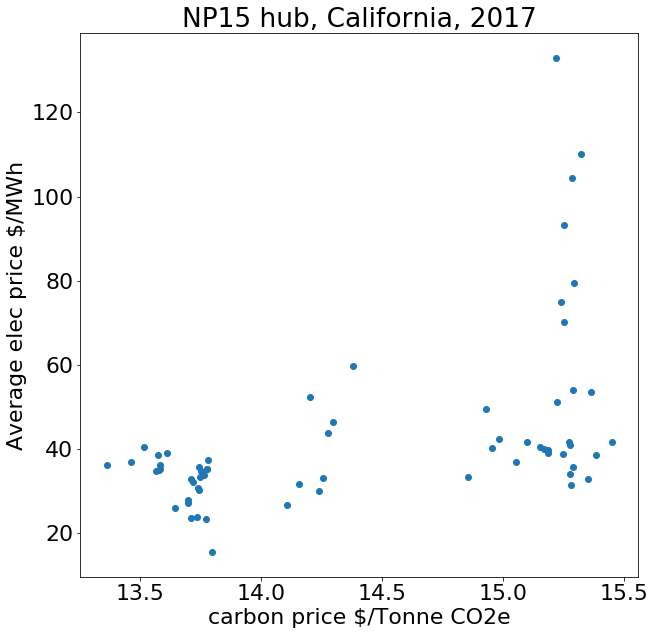

In [153]:
fig1, ax1 = plt.subplots()
ax1.scatter(df_NP15['Carbon price'],df_NP15['Average NP15 Elec price $/MWh'])
ax1.set_xlabel('carbon price $/Tonne CO2e')
ax1.set_ylabel('Average elec price $/MWh')
ax1.set_title('NP15 hub, California, 2017')
plt.savefig('images/NP15_vs_cali_CO2.png')
plt.show()



## SP15

   Trade date  Average NP15 Elec price $/MWh  High NP15 Elec price $/MWh  \
0  2017-01-03                          37.93                       38.50   
1  2017-01-04                          38.10                       38.75   
2  2017-01-05                          34.38                       35.25   
3  2017-01-08                          32.83                       33.75   
4  2017-01-09                          35.02                       35.50   

   Low NP15 Elec price $/MWh Carbon price  
0                      37.50         None  
1                      37.75         None  
2                      34.00       13.366  
3                      32.25         None  
4                      34.75       13.464  
   index  Trade date  Average NP15 Elec price $/MWh  \
0      2  2017-01-05                          34.38   
1      4  2017-01-09                          35.02   
2      5  2017-01-10                          36.98   
3      6  2017-01-11                          38.78   
4   

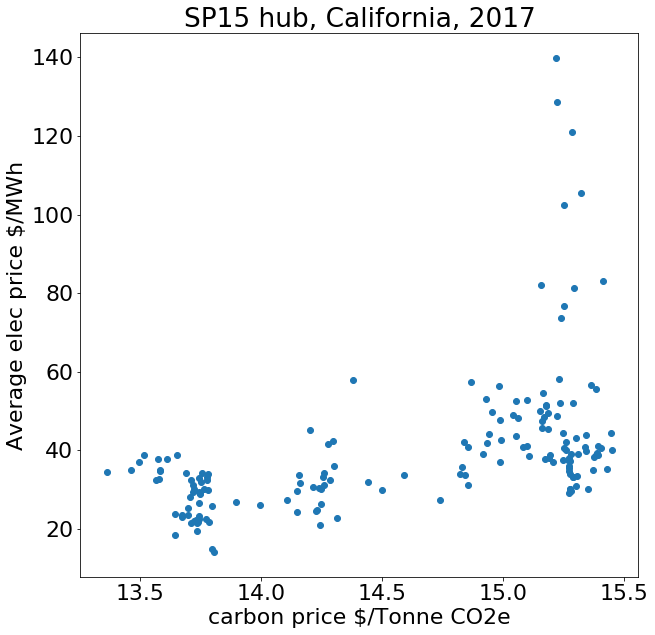

In [154]:
#load electricity price data
df_data=pd.read_excel('raw data/overall/ice_electric-2017final.xlsx')
df_data['Delivery date']=[x.date() for x in df_data['Delivery start date']]
df_data['Previous Delivery date'] = [x-datetime.timedelta(1) for x in df_data['Delivery date']]

# extract only NP15 hub
df_temp=df_data.drop(list(np.where(df_data['Price hub']!='SP15 EZ Gen DA LMP Peak')[0])).copy()
df_temp.reset_index(inplace=True)

#constuct NP15 dataframe
df_SP15=pd.DataFrame()
df_SP15['Trade date']=df_temp['Previous Delivery date']
df_SP15['Average NP15 Elec price $/MWh']=df_temp['Wtd avg price $/MWh']
df_SP15['High NP15 Elec price $/MWh']=df_temp['High price $/MWh']
df_SP15['Low NP15 Elec price $/MWh']=df_temp['Low price $/MWh']

#load emission data
df_emission_data=pd.read_csv('raw data/CAISO/Cali_carbon_dash.csv')
df_emission_data.dropna(axis=0, inplace=True)
df_emission_data.reset_index(inplace=True, drop=False)
del df_emission_data['index']
df_emission_data['New date']=[convert_str_to_datetime(x) for x in df_emission_data['date']]
df_emission_data.head()

#update carbon price data
df_SP15['Carbon price'] = [df_emission_data['Price'][np.where(df_emission_data['New date']==date)[0][0]] if date in list(df_emission_data['New date']) else 'None' for date in df_SP15['Trade date']]
print(df_SP15.head())

# remove non day with carbon price
df_SP15=df_SP15.drop(list(np.where(df_SP15['Carbon price']=='None')[0])).copy()
df_SP15.reset_index(inplace=True)
print(df_SP15.head())

fig2, ax2 = plt.subplots()
ax2.scatter(df_SP15['Carbon price'],df_SP15['Average NP15 Elec price $/MWh'])
ax2.set_xlabel('carbon price $/Tonne CO2e')
ax2.set_ylabel('Average elec price $/MWh')
ax2.set_title('SP15 hub, California, 2017')
plt.savefig('images/SP15_vs_cali_CO2.png')
plt.show()

In [58]:
start = datetime.datetime.strptime("21-06-2014", "%d-%m-%Y")
end = datetime.datetime.strptime("07-12-2014", "%d-%m-%Y")
date_generated = [start + datetime.timedelta(days=x) for x in range(0, (end-start).days)]
date_generated=[x.strftime("%m-%d-%Y") for x in date_generated]

for date in date_generated:
    print(date)


06-21-2014
06-22-2014
06-23-2014
06-24-2014
06-25-2014
06-26-2014
06-27-2014
06-28-2014
06-29-2014
06-30-2014
07-01-2014
07-02-2014
07-03-2014
07-04-2014
07-05-2014
07-06-2014
07-07-2014
07-08-2014
07-09-2014
07-10-2014
07-11-2014
07-12-2014
07-13-2014
07-14-2014
07-15-2014
07-16-2014
07-17-2014
07-18-2014
07-19-2014
07-20-2014
07-21-2014
07-22-2014
07-23-2014
07-24-2014
07-25-2014
07-26-2014
07-27-2014
07-28-2014
07-29-2014
07-30-2014
07-31-2014
08-01-2014
08-02-2014
08-03-2014
08-04-2014
08-05-2014
08-06-2014
08-07-2014
08-08-2014
08-09-2014
08-10-2014
08-11-2014
08-12-2014
08-13-2014
08-14-2014
08-15-2014
08-16-2014
08-17-2014
08-18-2014
08-19-2014
08-20-2014
08-21-2014
08-22-2014
08-23-2014
08-24-2014
08-25-2014
08-26-2014
08-27-2014
08-28-2014
08-29-2014
08-30-2014
08-31-2014
09-01-2014
09-02-2014
09-03-2014
09-04-2014
09-05-2014
09-06-2014
09-07-2014
09-08-2014
09-09-2014
09-10-2014
09-11-2014
09-12-2014
09-13-2014
09-14-2014
09-15-2014
09-16-2014
09-17-2014
09-18-2014
09-19-2014

In [56]:
date_new

['06-21-2014',
 '06-22-2014',
 '06-23-2014',
 '06-24-2014',
 '06-25-2014',
 '06-26-2014',
 '06-27-2014',
 '06-28-2014',
 '06-29-2014',
 '06-30-2014',
 '07-01-2014',
 '07-02-2014',
 '07-03-2014',
 '07-04-2014',
 '07-05-2014',
 '07-06-2014',
 '07-07-2014',
 '07-08-2014',
 '07-09-2014',
 '07-10-2014',
 '07-11-2014',
 '07-12-2014',
 '07-13-2014',
 '07-14-2014',
 '07-15-2014',
 '07-16-2014',
 '07-17-2014',
 '07-18-2014',
 '07-19-2014',
 '07-20-2014',
 '07-21-2014',
 '07-22-2014',
 '07-23-2014',
 '07-24-2014',
 '07-25-2014',
 '07-26-2014',
 '07-27-2014',
 '07-28-2014',
 '07-29-2014',
 '07-30-2014',
 '07-31-2014',
 '08-01-2014',
 '08-02-2014',
 '08-03-2014',
 '08-04-2014',
 '08-05-2014',
 '08-06-2014',
 '08-07-2014',
 '08-08-2014',
 '08-09-2014',
 '08-10-2014',
 '08-11-2014',
 '08-12-2014',
 '08-13-2014',
 '08-14-2014',
 '08-15-2014',
 '08-16-2014',
 '08-17-2014',
 '08-18-2014',
 '08-19-2014',
 '08-20-2014',
 '08-21-2014',
 '08-22-2014',
 '08-23-2014',
 '08-24-2014',
 '08-25-2014',
 '08-26-20